# Preprocessing Structured Data

#  1) Convert Pandas Categorical Data For Scikit-Learn?

In [1]:
# Importing required packages
from sklearn import preprocessing
import pandas as pd

In [2]:
# Create a data frame
raw_data = {'patient': [1, 1, 1, 2, 2],
        'obs': [1, 2, 3, 1, 2],
        'treatment': [0, 1, 0, 1, 0],
        'score': ['strong', 'weak', 'normal', 'weak', 'strong']}
df = pd.DataFrame(raw_data, columns = ['patient', 'obs', 'treatment', 'score'])

In [3]:
# create a label (category) encoder object
le = preprocessing.LabelEncoder()

In [4]:
le.fit(df['score'])

LabelEncoder()

In [5]:
# View the list(if u want)
list(le.classes_)

['normal', 'strong', 'weak']

In [6]:
# Apply the fitted encoder to the pandas columns
le.transform(df['score'])

array([1, 2, 0, 2, 1])

# 2) Delete Observations With Missing Values?

In [7]:
import numpy as np
import pandas as pd

In [8]:
# Create feature matrix
X = np.array([[1.1, 11.1], 
              [2.2, 22.2], 
              [3.3, 33.3], 
              [4.4, 44.4], 
              [np.nan, 55]])

In [9]:
# Remove observation with Missing values.
X[~np.isnan(X).any(axis= 1)]

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [ 3.3, 33.3],
       [ 4.4, 44.4]])

# 3) Detecting Outliers?

In [10]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

In [11]:
# Create simulated data
X, _ = make_blobs(n_samples = 10,
                  n_features = 2,
                  centers = 1,
                  random_state = 1)

# Replace the first observation's values with extreme values
X[0,0] = 10000
X[0,1] = 10000

EllipticEnvelope assumes the data is normally distributed and based on that assumption “draws” an ellipse around the data, classifying any observation inside the ellipse as an inlier (labeled as 1) and any observation outside the ellipse as an outlier (labeled as -1). A major limitation of this approach is the need to specify a contamination parameter which is the proportion of observations that are outliers, a value that we don’t know.

In [12]:
# Create detector
outlier_detector = EllipticEnvelope(contamination=.1)
# Fit detector
outlier_detector.fit(X)
# Predict outlier
outlier_detector.predict(X)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

# 4) Discretize Features?

In [13]:
from sklearn.preprocessing import Binarizer
import numpy as np

In [14]:
# Create feature
age = np.array([[6], 
                [12], 
                [20], 
                [36], 
                [65]])

In [15]:
# Binarize feature
binarizer = Binarizer(18)
# Tranform feature
binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [16]:
# Bin feature
np.digitize(age,bins=[20,30,60])

array([[0],
       [0],
       [1],
       [2],
       [3]], dtype=int64)

# 5) Encoding Ordinal Categorical Features?

In [17]:
import pandas as pd

In [18]:
# Create features
df = pd.DataFrame({'Score': ['Low', 
                             'Low', 
                             'Medium', 
                             'Medium', 
                             'High']})

# View data frame
df

,Score
0,Low
1,Low
2,Medium
3,Medium
4,High


In [19]:
# create mapper
scale_mapper = {'Low':1,
               'Medium':2,
               'High':3}

In [20]:
# Map features values to scale
df['Scale'] = df['Score'].replace(scale_mapper)
df

,Score,Scale
0,Low,1
1,Low,1
2,Medium,2
3,Medium,2
4,High,3


# 6) Handling Outliers?

In [21]:
# Load library
import pandas as pd


In [22]:
# Create DataFrame
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]

houses

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500
3,4322032,116.0,48000


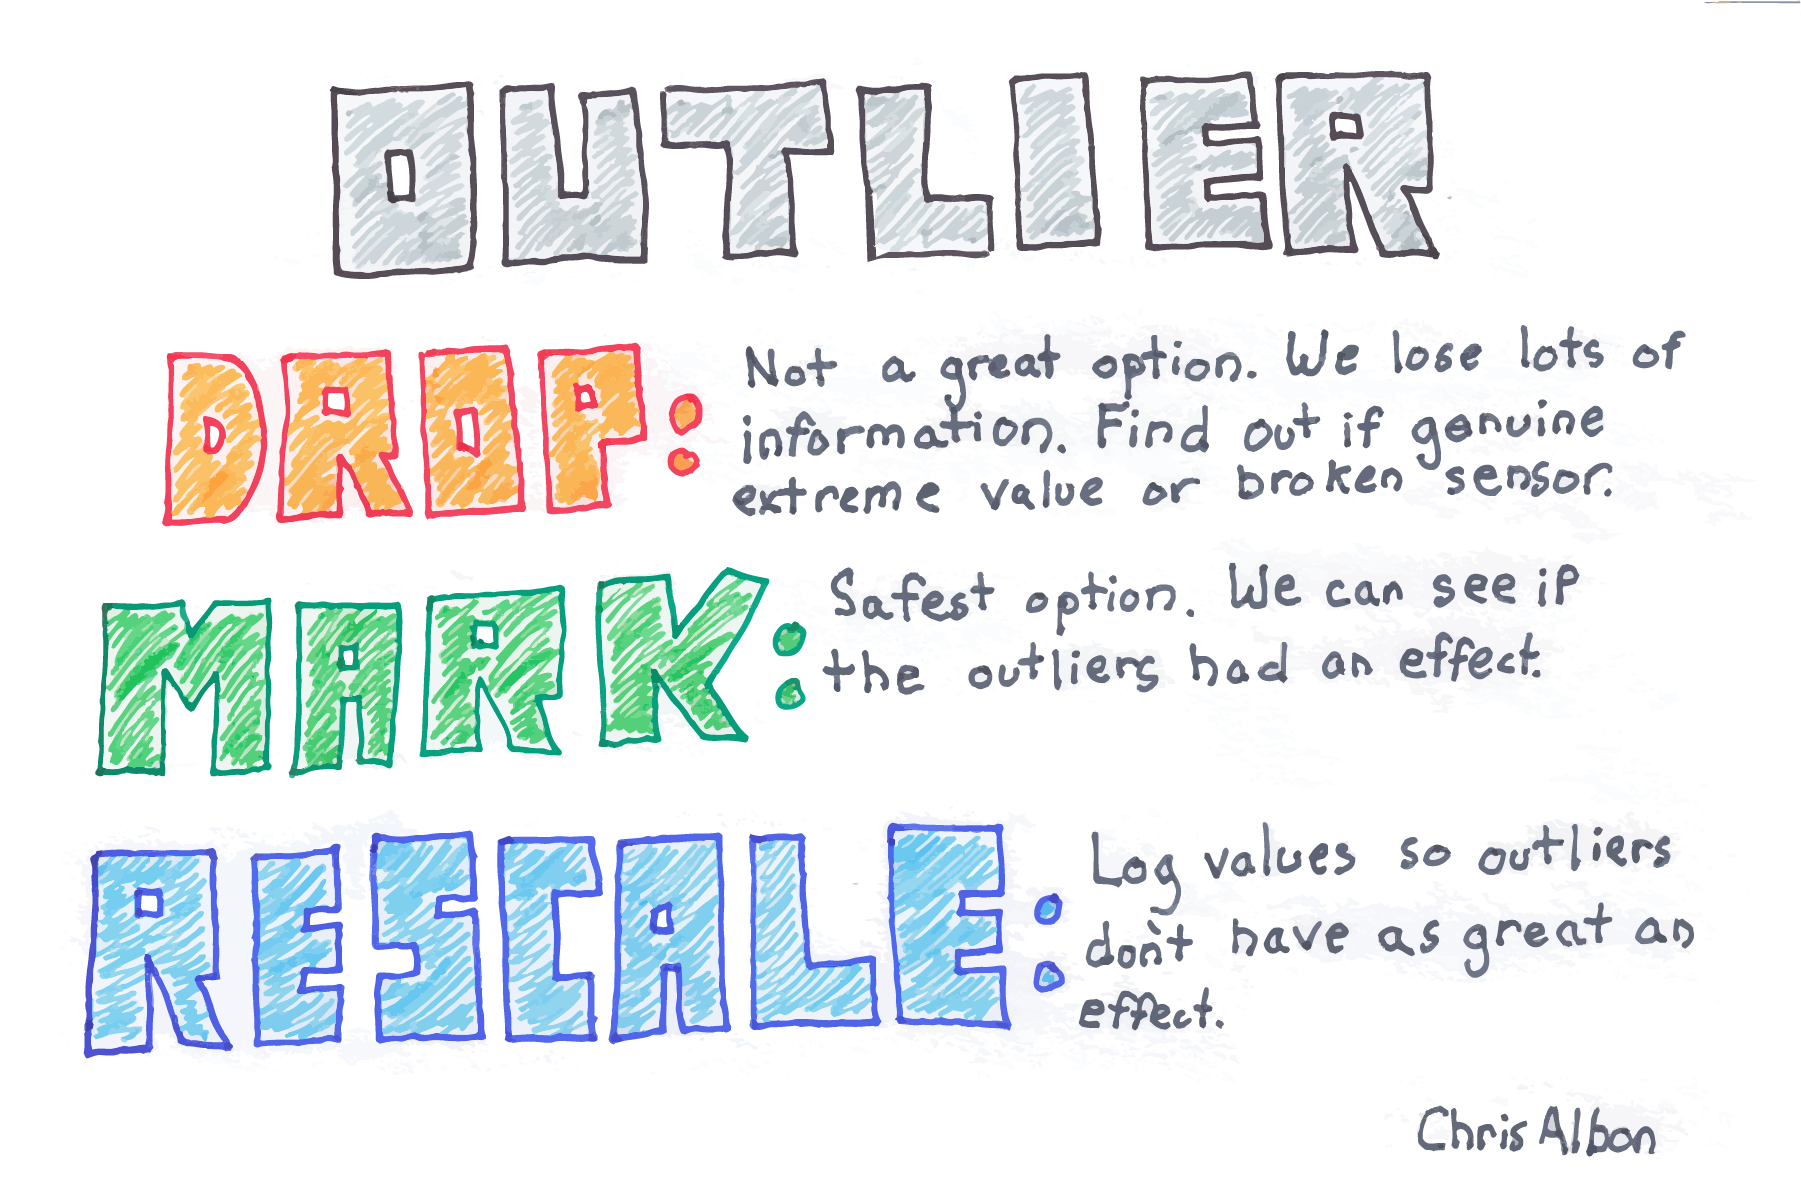!]

In [23]:
# Drop observation greater than some values
houses[houses['Bathrooms'] < 20]

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


In [24]:
# create a feature based on boolean condition
houses['Outlier'] = np.where(houses['Bathrooms'] < 20,0,1)
houses

,Price,Bathrooms,Square_Feet,Outlier
0,534433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,48000,1


In [25]:
houses['log_of_square_feet'] = [np.log(x) for x in houses['Square_Feet']]
houses

,Price,Bathrooms,Square_Feet,Outlier,log_of_square_feet
0,534433,2.0,1500,0,7.313220
1,392333,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,4322032,116.0,48000,1,10.778956


# 7) Impute Missing Values With Means

Mean imputation replaces missing values with the mean value of that feature/variable. Mean imputation is one of the most ‘naive’ imputation methods because unlike more complex methods like k-nearest neighbors imputation, it does not use the information we have about an observation to estimate a value for it.

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer

In [27]:
# Create an empty dataset
df = pd.DataFrame()

# Create two variables called x0 and x1. Make the first value of x1 a missing value
df['x0'] = [0.3051,0.4949,0.6974,0.3769,0.2231,0.341,0.4436,0.5897,0.6308,0.5]
df['x1'] = [np.nan,0.2654,0.2615,0.5846,0.4615,0.8308,0.4962,0.3269,0.5346,0.6731]

# View the dataset
df

,x0,x1
0,0.3051,NaN
1,0.4949,0.2654
2,0.6974,0.2615
3,0.3769,0.5846
4,0.2231,0.4615
5,0.3410,0.8308
6,0.4436,0.4962
7,0.5897,0.3269
8,0.6308,0.5346
9,0.5000,0.6731


In [28]:
# Create an imputer object that looks for 'Nan' values, then replaces them with the mean value of the feature by columns (axis=0)
mean_imputer = Imputer(missing_values ='NaN',strategy='mean',axis=0)
mean_imputer = mean_imputer.fit(df)

C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
imputed_mean =mean_imputer.transform(df.values)
imputed_mean

array([[0.3051    , 0.49273333],
       [0.4949    , 0.2654    ],
       [0.6974    , 0.2615    ],
       [0.3769    , 0.5846    ],
       [0.2231    , 0.4615    ],
       [0.341     , 0.8308    ],
       [0.4436    , 0.4962    ],
       [0.5897    , 0.3269    ],
       [0.6308    , 0.5346    ],
       [0.5       , 0.6731    ]])